In [27]:
from rdkit.Chem import MACCSkeys                       #MACCS Keys
from rdkit import Chem, DataStructs
from rdkit.ML.Cluster import Butina

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

class std_tendency():
    
    # if i instantiate something here, 
    # a class variable is shared by all class instances
    
    # >> it would be a 'class attribute'
    
    def __init__(self,wdir,csv,chem_num): 
        # >> it would be a instance attribute 
        self.wdir = wdir
        self.csv = csv
        self.chem_num = chem_num
        
        self.df = pd.read_csv(self.wdir+self.csv)
        self.maccfps = std_tendency.get_maccfps(self)
        # >> if i do it like the above, we can bring the value with just call the attribute
        # >> when we instantiate the class, a certain value would be produced
        self.chem_sim = std_tendency.get_sim(self)
        
        self.df_stdval = std_tendency.get_df_stdval(self)
        self.df_stdsim = std_tendency.get_df_stdsim(self)
        self.highsim_stdval = []
        
        self.c0, self.c1, self.c2, selc.c3, self.c4 = [], [], [], [], []
        self.c0_x, self.c1_x, selc.c2_x, self.c3_x, self.c4_x = [], [], [], [], []
        
        
        
    '''
    class BB: 
    
    def __init__(self,name):
        self.name = name 
        self.all = []
        
    def add_some(self,some):  # >> some is from global value, when we want to use this function
        self.all.append(some) 
        # >> in the class method function, we can use class attribute
        
    '''

    def get_maccfps(self):
        df = self.df
        df['Standard Value'].dropna(axis=0)
        smi = df['Canonical Smiles']
        sd = [Chem.MolFromSmiles(m) for m in smi] 
        maccfps = [MACCSkeys.GenMACCSKeys(m) for m in sd]
        return maccfps
        
    def get_sim(self):
        result = DataStructs.BulkTanimotoSimilarity(self.maccfps[self.chem_num],self.maccfps[:])
        return result 
    
    def get_df_stdval(self):
        df = self.df
        return df['Standard Value'].dropna(axis=0)
    
    def get_std_scatter_of_total_sim(self):
          
        # 0-0.2  >>> class0
        # 0.2 - 0.4 >>> class1 
        # 0.4 - 0.6 >>> class2 
        # 0.6 - 0.8 >>> class3 
        # 0.8 - 1.0 >>> class4 

        class0, class1, class2, class3, class4 = [], [], [], [], []
        class0_x, class1_x, class2_x, class3_x, class4_x = [], [], [], [], []


        for i in range(len(self.chem_sim)):
            if 0.0 <= self.chem_sim[i] <= 0.2: 
                class0.append(self.chem_sim[i])
                class0_x.append(i)
            elif 0.2 < self.chem_sim[i] <= 0.4 :
                class1.append(self.chem_sim[i])
                class1_x.append(i)
            elif 0.4 < self.chem_sim[i] <= 0.6 :
                class2.append(self.chem_sim[i])
                class2_x.append(i)
            elif 0.6 < self.chem_sim[i] <= 0.8 :
                class3.append(self.chem_sim[i])
                class3_x.append(i)
            elif 0.8 < self.chem_sim[i] <= 1.0 : 
                class4.append(self.chem_sim[i])
                class4_x.append(i)
    
        plt.scatter(class0_x,class0,c='blue',label='class0')
        plt.scatter(class1_x,class1,c='black',label='class1')
        plt.scatter(class2_x,class2,c='yellow',label='class2')
        plt.scatter(class3_x,class3,c='green',label='class3')
        plt.scatter(class4_x,class4,c='red',label='class4')
        plt.show()
        
        
    def get_df_stdsim(self):
        
        df_sim =pd.DataFrame(self.chem_sim)
        
        df_result = pd.concat([self.df_stdval,df_sim],axis=1,ignore_index=True)
        df_result.columns = ['Standard_Value','Similarity']
        return df_result
    
    def get_std_scatter_of_high_sim(self):
        #std_val_df = self.df
        #std_val_df = std_val_df['Standard Value'].dropna(axis=0)
        
        df_result = self.df_stdsim
                
        cluster_label = []

        for row in df_result['Similarity']:
            if row >= 0.8 : 
                cluster_label.append('c4')
            elif row >= 0.6 : 
                cluster_label.append('c3')
            elif row >= 0.4 : 
                cluster_label.append('c2')
            elif row >= 0.2 : 
                cluster_label.append('c1')
            else : 
                cluster_label.append('c0')
        
        df_result['cluster_label'] = cluster_label
        
        c4_stdval, c4_stdval_x = [], []
        
        for i in range(len(df_result)):
            if df_result.loc[i]['cluster_label'] == 'c4':
                c4_stdval.append(df_result.loc[i]['Standard_Value'])
                c4_stdval_x.append(i)
                
        self.highsim_stdval = c4_stdval
                
        plt.scatter(c4_stdval_x,c4_stdval,c='red',label='class4')
        
        
    def get_variance(self):
        if not self.highsim_stdval : 
            return print("--- no value ---\n Please get scatter plot first.")
        else : 
            return np.var(self.highsim_stdval)
        
      

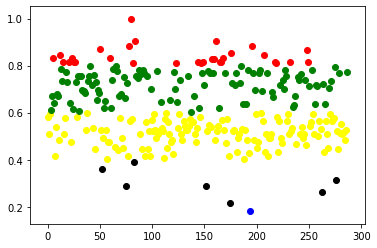

 a is 
[14.0, 17.2, 3.31, 3.05, 3.22, 7.25, 1.77, 154.0, 30.3, 1000.0, 614.0, 8.1, 350.0, 17.2, 4.56, 8.1, 9.57, 20.0, 20.0, 350.0, 0.91, 11.8, 3700.0, 595.0, 1000.0, 24.6, 5.08, 120.0, 5.63, 100.0, 16.9]
 from a -> 469057.88782393344
 func_var -> 469057.88782393344
log val -> 13.058481468007804


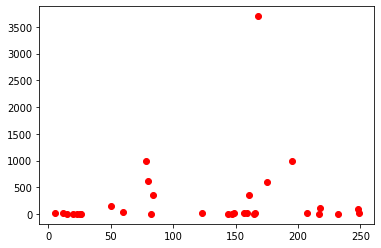

In [45]:
wdir = '/Users/beomjin_seo/Documents/work_space/kist-europe/QSAR/AOP_data/'
csv = 'final_ic50.csv' 
chem_num = 80
# you can enter a number as order of chemical molcules 
# 0 ~ 286

molcule = std_tendency(wdir,csv,chem_num)
molcule.get_std_scatter_of_total_sim()
molcule.get_std_scatter_of_high_sim()
a = molcule.highsim_stdval
b = np.var(a)
b
print(f' a is \n{a}\n from a -> {b}\n func_var -> {molcule.get_variance()}\nlog val -> {np.log(b)}')